<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-08/blob/main/hw_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Nataliia-Kaguia/goit-ds-hw-08.git

import os
base_path = "/content/goit-ds-hw-08/data"   # шлях у лапках!

print("Папки в data:", os.listdir(base_path))

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    print(f"\nФайли в {folder}:")
    print(os.listdir(folder_path)[:3])  # покажемо перші 3


fatal: destination path 'goit-ds-hw-08' already exists and is not an empty directory.
Папки в data: ['idle', 'running', 'stairs', 'walking']

Файли в idle:
['idle-177.csv', 'idle-858.csv', 'idle-231.csv']

Файли в running:
['running-1027.csv', 'running-2814.csv', 'running-685.csv']

Файли в stairs:
['stairs-149.csv', 'stairs-106.csv', 'stairs-99.csv']

Файли в walking:
['walking-1608.csv', 'walking-780.csv', 'walking-1316.csv']


In [ ]:
import pandas as pd

sample_file = os.path.join(base_path, "walking", os.listdir(os.path.join(base_path, "walking"))[0])
df = pd.read_csv(sample_file)

print("Колонки у файлі:", df.columns.tolist())
print(df.head())


Колонки у файлі: ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']
   accelerometer_X  accelerometer_Y  accelerometer_Z
0        -0.957681        -7.843405         1.833959
1        -3.299210       -14.465767        -1.316811
2        -7.005434         3.840300         4.070143
3         9.184157       -15.145720        -2.145205
4        -0.148441       -14.709975        -9.093178


In [ ]:
import pandas as pd
import os
from tqdm import tqdm  # красивий прогрес-бар

base_path = "/content/goit-ds-hw-08/data"

all_data = []

for label in os.listdir(base_path):
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for file in tqdm(os.listdir(folder_path), desc=f"Читаємо {label}"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            df["label"] = label   # додаємо колонку з класом
            all_data.append(df)

# об'єднуємо всі у один датафрейм
data = pd.concat(all_data, ignore_index=True)

print("Форма датасету:", data.shape)
print("Класи:", data["label"].value_counts())
data.head()


Читаємо walking: 100%|██████████| 1850/1850 [00:02<00:00, 725.17it/s]


Форма датасету: (193860, 4)
Класи: label
running    102240
walking     55500
idle        31170
stairs       4950
Name: count, dtype: int64


,accelerometer_X,accelerometer_Y,accelerometer_Z,label
0,0.536301,7.077260,6.694188,idle
1,0.493206,6.962339,6.727707,idle
2,0.459687,7.000646,6.646304,idle
3,0.277727,6.694188,6.751649,idle
4,0.464475,6.761226,7.019799,idle


In [ ]:
import numpy as np

def extract_features(df, window_size=128, step_size=64):
    """
    df - датафрейм з колонками accelerometer_X, accelerometer_Y, accelerometer_Z, label
    window_size - довжина вікна
    step_size - крок вікна
    """
    features = []
    labels = []

    for label in df["label"].unique():
        subset = df[df["label"] == label][["accelerometer_X", "accelerometer_Y", "accelerometer_Z"]].values

        for start in range(0, len(subset) - window_size, step_size):
            window = subset[start:start+window_size]
            feats = []
            # для кожної осі X, Y, Z
            for i in range(3):
                axis = window[:, i]
                feats += [
                    np.mean(axis),
                    np.std(axis),
                    np.min(axis),
                    np.max(axis),
                    np.median(axis),
                    np.percentile(axis, 25),
                    np.percentile(axis, 75),
                    np.mean(axis**2),     # енергія
                    np.mean(np.abs(axis)) # середнє абсолютне
                ]
            # Signal Magnitude Area (сумарна активність по 3 осях)
            sma = np.mean(np.abs(window[:,0]) + np.abs(window[:,1]) + np.abs(window[:,2]))
            feats.append(sma)

            features.append(feats)
            labels.append(label)

    columns = []
    axes = ["X", "Y", "Z"]
    stats = ["mean","std","min","max","median","q25","q75","energy","abs_mean"]
    for ax in axes:
        for st in stats:
            columns.append(f"{ax}_{st}")
    columns.append("SMA")

    return pd.DataFrame(features, columns=columns), np.array(labels)

X, y = extract_features(data, window_size=128, step_size=64)

print("Форма X:", X.shape)
print("Форма y:", y.shape)
print(pd.Series(y).value_counts())
X.head()


Форма X: (3024, 28)
Форма y: (3024,)
running    1596
walking     866
idle        486
stairs       76
Name: count, dtype: int64


,X_mean,X_std,X_min,X_max,X_median,X_q25,X_q75,X_energy,X_abs_mean,Y_mean,...,Z_mean,Z_std,Z_min,Z_max,Z_median,Z_q25,Z_q75,Z_energy,Z_abs_mean,SMA
0,-0.018106,0.553227,-1.857900,2.518700,0.172383,-0.301669,0.277727,0.306388,0.413898,3.259332,...,8.697798,1.120261,6.363788,10.855310,8.815451,7.560889,9.763555,76.906678,8.697798,12.400656
1,-0.069357,1.099175,-10.448297,2.518700,0.234632,-0.231040,0.365116,1.212997,0.519018,1.617657,...,9.238140,0.975722,4.553772,10.855310,9.742007,8.925584,9.773131,86.295255,9.238140,11.447614
2,0.050914,1.017945,-10.448297,0.545878,0.248997,0.073023,0.363919,1.038804,0.397250,1.967660,...,8.990377,1.158715,4.553772,9.816227,9.749189,8.111555,9.773131,82.169501,8.990377,11.414319
3,-0.078709,0.996225,-10.448297,0.545878,-0.050278,-0.114922,0.248997,0.998659,0.319626,0.997597,...,9.325416,1.017223,4.553772,9.816227,9.768343,9.739613,9.777920,87.998121,9.325416,10.750527
4,-0.128688,1.013254,-10.448297,0.799663,-0.100556,-0.125695,0.192733,1.043245,0.342969,2.837503,...,8.613290,1.361279,4.553772,9.811439,9.739613,7.268797,9.773131,76.041853,8.613290,11.886688


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Масштабування (для SVM особливо)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))


=== Random Forest ===
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00        97
     running       1.00      1.00      1.00       320
      stairs       1.00      1.00      1.00        15
     walking       1.00      1.00      1.00       173

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



In [ ]:
# 4. SVM
svm = SVC(kernel="rbf", C=10, gamma="scale", random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print("\n=== SVM (RBF) ===")
print(classification_report(y_test, svm_pred))



=== SVM (RBF) ===
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00        97
     running       1.00      1.00      1.00       320
      stairs       1.00      1.00      1.00        15
     walking       1.00      1.00      1.00       173

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



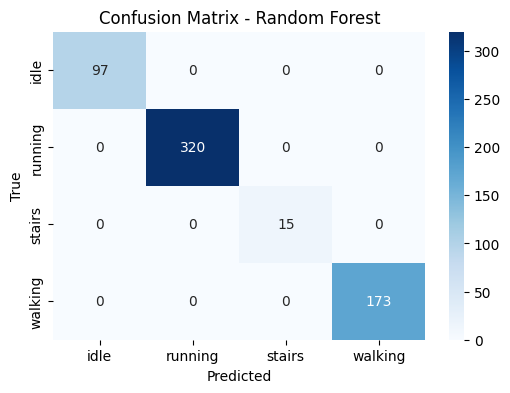

In [ ]:
# 5. Матриця плутанини для Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


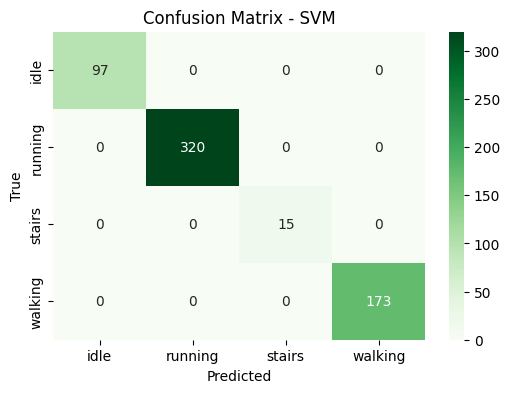

In [ ]:
# 6. Матриця плутанини для SVM
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
